# Recogida de datos

## Lectura del CSV

In [1]:
import pathlib

path=str(pathlib.Path().resolve())+"/"

In [2]:
import pandas as pd


df = pd.read_csv(path+"creditcard.csv")
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


## Tratamiento del DataSet

Vamos a recoger todos los fraudes que son cerca a 500 datos, al haber muchísimas filas sin Fraude, recogemos las filas para que el 66% de los datos sean no fraudes y el 33% de fraudes 

In [3]:
#from matplotlib import pyplot as plt
#import seaborn as sns
#import numpy as np
#
#fraude = df[df['Class'] == 1]
#no_fraude = df[df['Class'] == 0].sample(int(len(fraude)*2),random_state=42)
#
#
#df=pd.concat([fraude,no_fraude])
#fig,ax=plt.subplots()
#sns.countplot(data=df,x='Class')
#
#print(len(fraude)*100/len(df),"%")
#print(len(no_fraude)*100/len(df),"%")

# Análisis del DataSet

Vemos que hay numerosas columnas que no tienen relación con Class que es lo que intentamos predecir

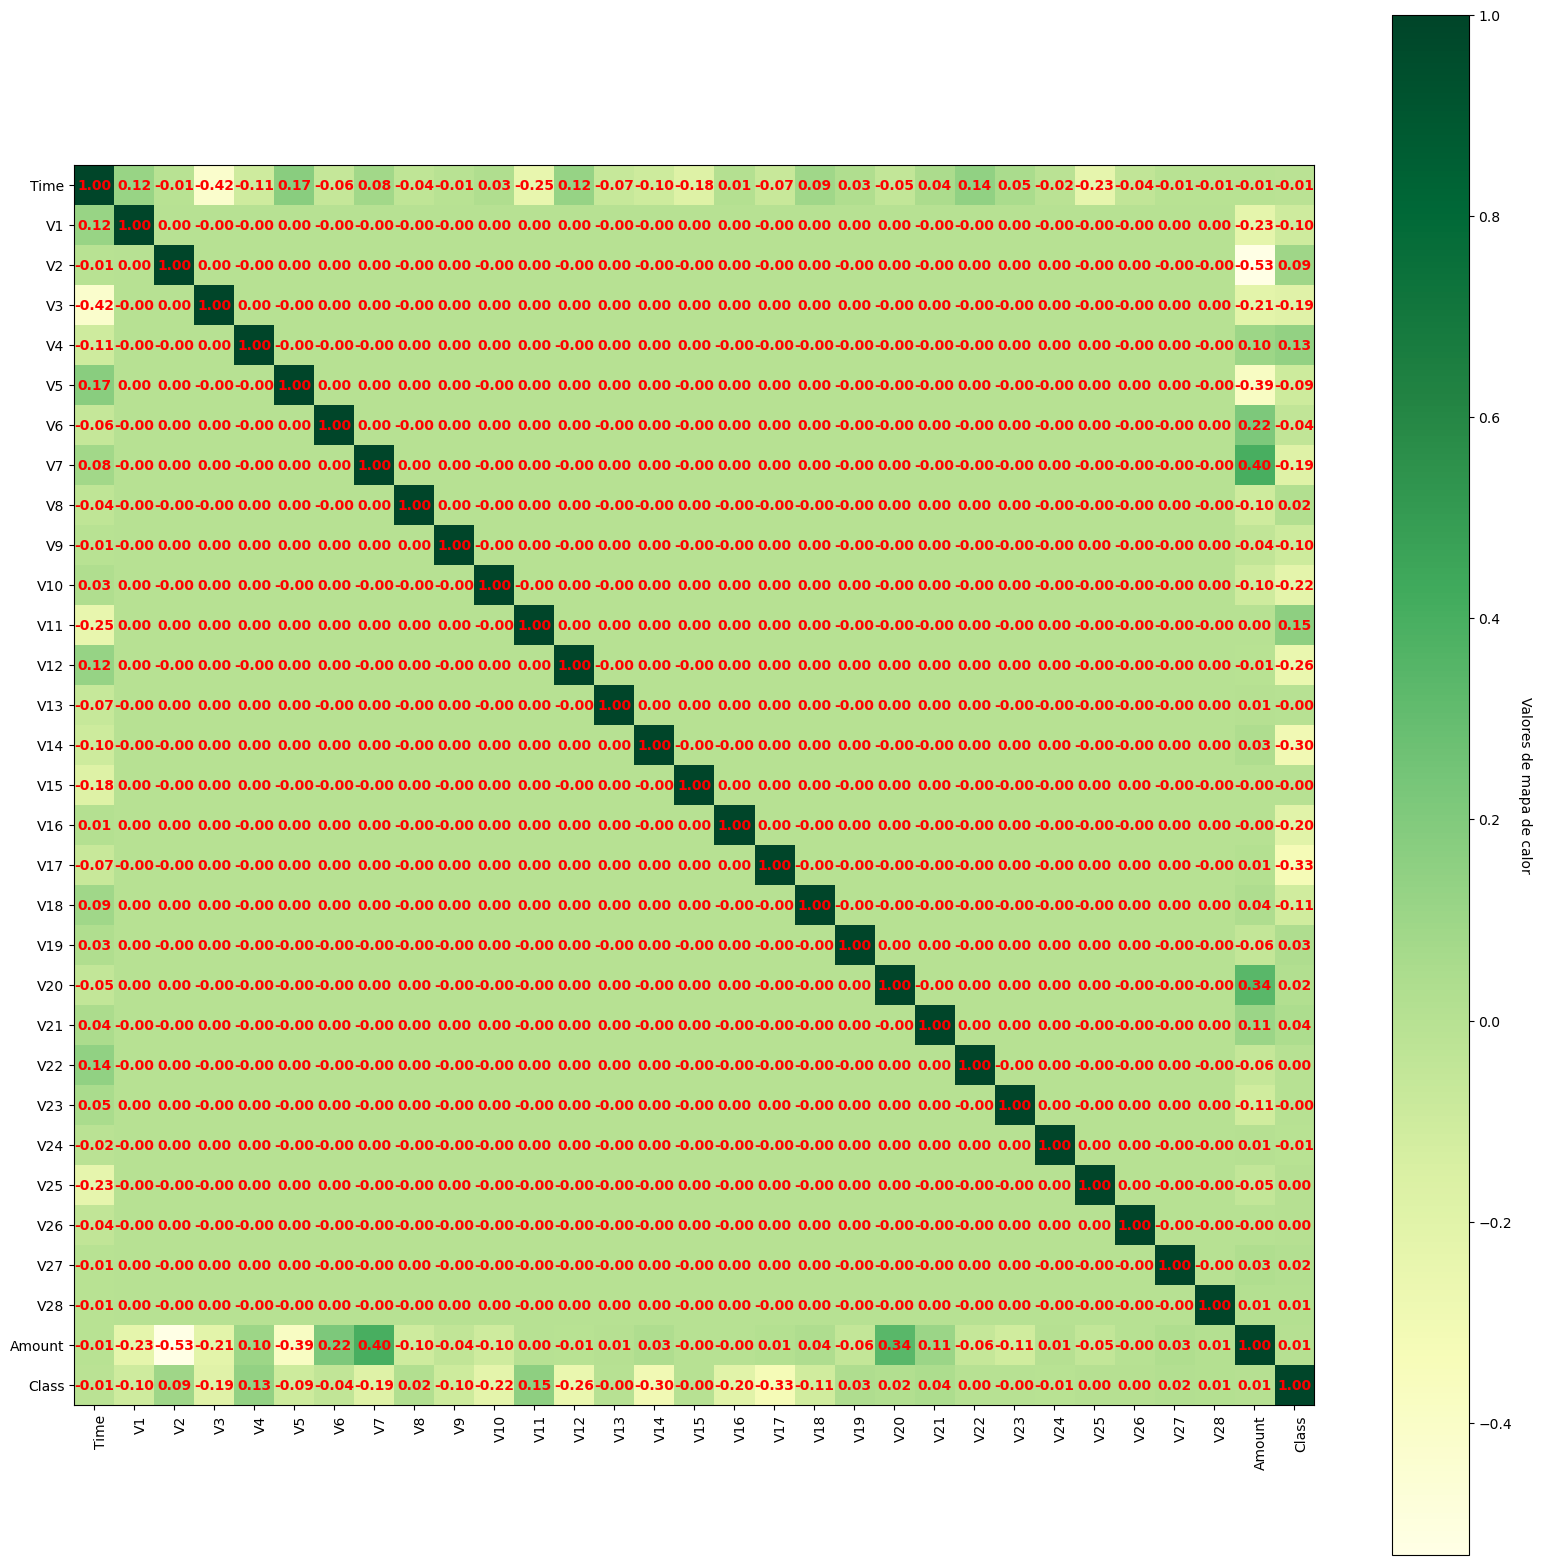

In [4]:
from Clases.Matplot.HeatMap import HeatMap


corr_matrix = df.corr()
HeatMap.heat_map(corr_matrix,corr_matrix.columns,corr_matrix,corr_matrix.columns,corr_matrix.columns,cmap="YlGn",figsize=(20,20),weight="bold",textColor="red")

## Borrar columnas con poca correlación

Borramos del DataSet las columnas con poca correlación que no se comprendan de [0.09 - -0.09]

In [5]:
#df=df[corr_matrix[(corr_matrix['Class']>=0.09) | (corr_matrix['Class']<=-0.09)].index]

## Borrar Outliers

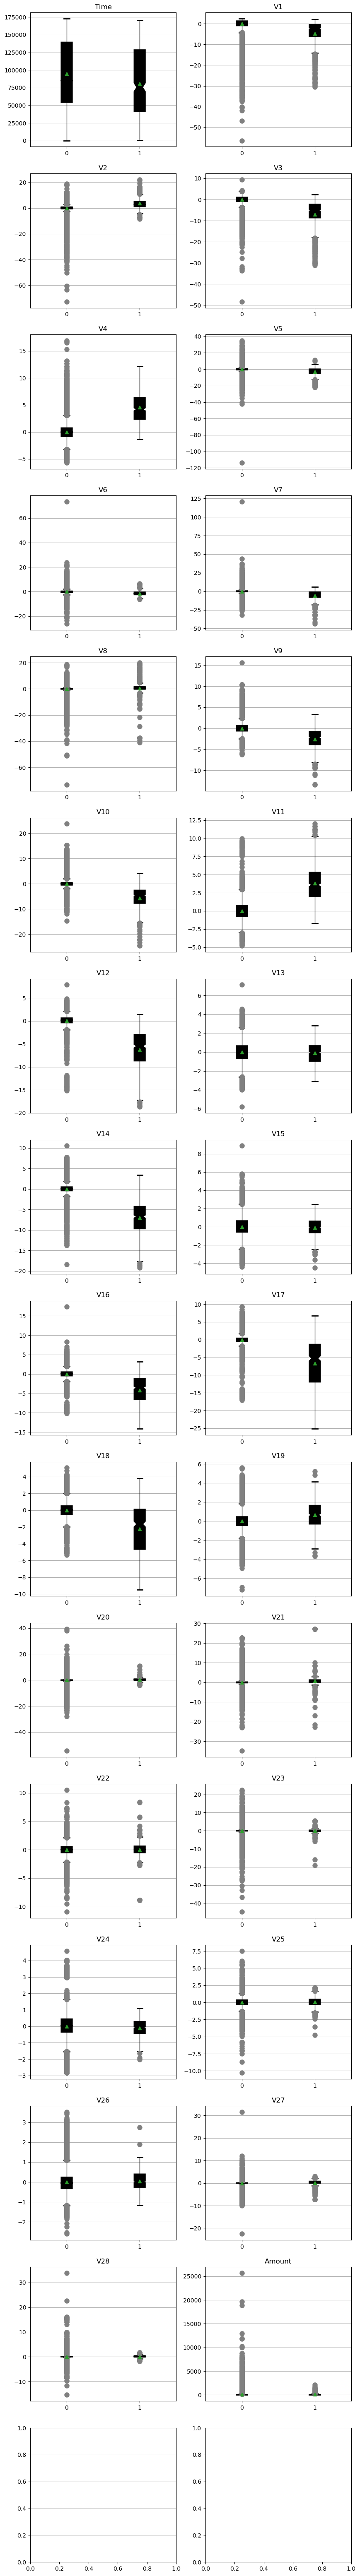

In [6]:
from Clases.Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(df.columns,df,"Class")

In [7]:
def remove_outliers(columns,df):
    df2=df.dropna(subset=columns)
    for j in columns:
        q1 = df2[j].quantile(0.25)
        q3 = df2[j].quantile(0.75)
        iqr = q3-q1
        Lower_tail = q1 - 1.5 * iqr
        Upper_tail = q3 + 1.5 * iqr
        med = np.median(df2[j])
        for i in df[j]:
            if i > Upper_tail or i < Lower_tail:
                df[j] = df[j].replace(i, med)
    return df

#dfT = df[df["Class"]==0]
#dfT = remove_outliers([col for col in dfT.columns if dfT[col].dtype in ['float64','int64']],dfT)

#df = pd.concat([dfT,df[df["Class"]==1]])

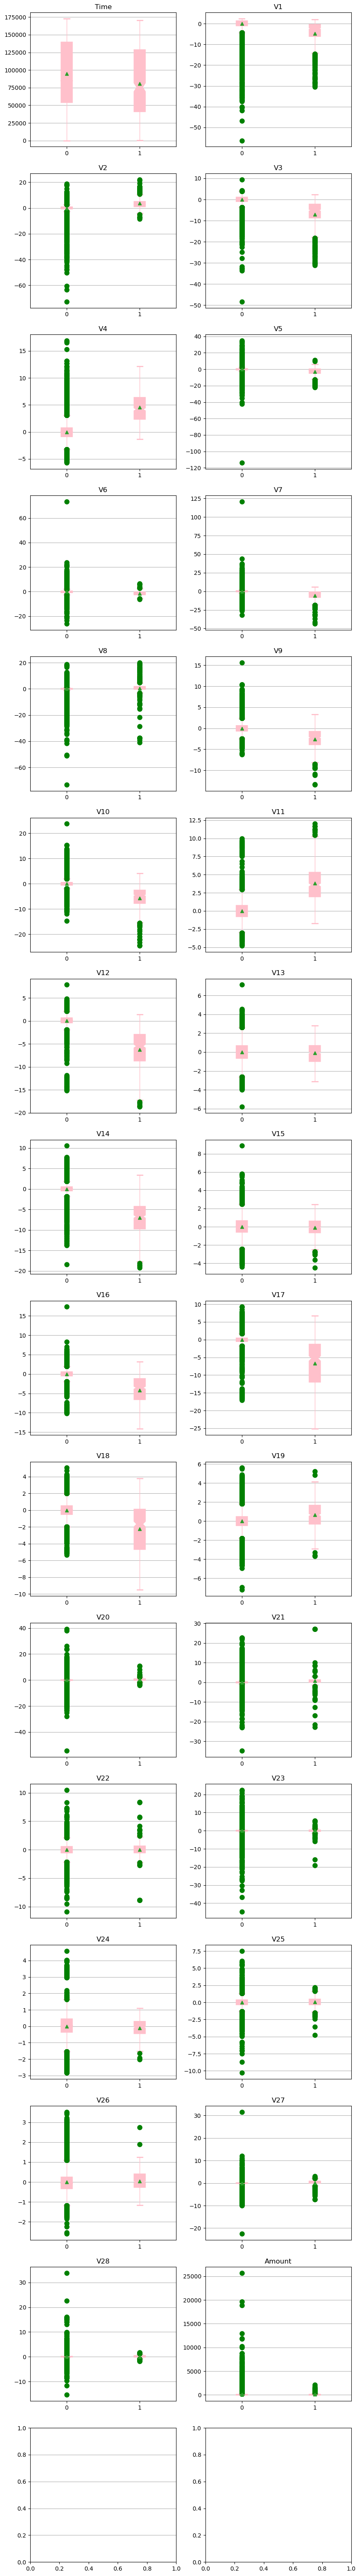

In [8]:
from Clases.Matplot.BoxPlot import BoxPlot


BoxPlot.box_plot(df.columns,df,"Class","Pink","Pink","Green","Green")

In [9]:
df

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,172786.0,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,7.305334,1.914428,...,0.213454,0.111864,1.014480,-0.509348,1.436807,0.250034,0.943651,0.823731,0.77,0
284803,172787.0,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.294869,0.584800,...,0.214205,0.924384,0.012463,-1.016226,-0.606624,-0.395255,0.068472,-0.053527,24.79,0
284804,172788.0,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.708417,0.432454,...,0.232045,0.578229,-0.037501,0.640134,0.265745,-0.087371,0.004455,-0.026561,67.88,0
284805,172788.0,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.679145,0.392087,...,0.265245,0.800049,-0.163298,0.123205,-0.569159,0.546668,0.108821,0.104533,10.00,0


# Análisis de los Datos X e Y

Randomizamos el Dataset para embarajar los datos, luego recogeremos las columnas respectivas de X e Y

In [10]:
df=df.sample(frac=1,random_state=42)

In [11]:
X = df.drop('Class',axis=1)
Y = df['Class']

In [12]:
X

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
43428,41505.0,-16.526507,8.584972,-18.649853,9.505594,-13.793819,-2.832404,-16.701694,7.517344,-8.507059,...,-1.514923,1.190739,-1.127670,-2.358579,0.673461,-1.413700,-0.462762,-2.018575,-1.042804,364.19
49906,44261.0,0.339812,-2.743745,-0.134070,-1.385729,-1.451413,1.015887,-0.524379,0.224060,0.899746,...,0.506044,-0.213436,-0.942525,-0.526819,-1.156992,0.311211,-0.746647,0.040996,0.102038,520.12
29474,35484.0,1.399590,-0.590701,0.168619,-1.029950,-0.539806,0.040444,-0.712567,0.002299,-0.971747,...,0.212877,0.102398,0.168269,-0.166639,-0.810250,0.505083,-0.232340,0.011409,0.004634,31.00
276481,167123.0,-0.432071,1.647895,-1.669361,-0.349504,0.785785,-0.630647,0.276990,0.586025,-0.484715,...,-0.244633,0.358932,0.873663,-0.178642,-0.017171,-0.207392,-0.157756,-0.237386,0.001934,1.50
278846,168473.0,2.014160,-0.137394,-1.015839,0.327269,-0.182179,-0.956571,0.043241,-0.160746,0.363241,...,-0.255293,-0.238644,-0.616400,0.347045,0.061561,-0.360196,0.174730,-0.078043,-0.070571,0.89
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119879,75618.0,1.173488,0.100792,0.490512,0.461596,-0.296377,-0.213165,-0.165254,0.119221,-0.114199,...,-0.157534,-0.186027,-0.574283,0.161405,-0.006140,0.091444,0.109235,-0.020922,0.003967,1.98
259178,159000.0,-0.775981,0.144023,-1.142399,-1.241113,1.940358,3.912076,-0.466107,1.360620,0.400697,...,-0.295730,0.037078,-0.019575,0.241830,0.682820,-1.635109,-0.770941,0.066006,0.137056,89.23
131932,79795.0,-0.146609,0.992946,1.524591,0.485774,0.349308,-0.815198,1.076640,-0.395316,-0.491303,...,0.007155,0.052649,0.354089,-0.291198,0.402849,0.237383,-0.398467,-0.121139,-0.196195,3.94
146867,87931.0,-2.948638,2.354849,-2.521201,-3.798905,1.866302,2.727695,-0.471769,2.217537,0.580199,...,0.417396,-0.332759,-1.047514,0.143326,0.678869,0.319710,0.426309,0.496912,0.335822,1.00


# Manejo de datos con PCA

Vemos cuanto tiempo le lleva en tratar los datos al PCA y estandarizarlos

In [13]:
import time
from sklearn.decomposition import PCA, TruncatedSVD
from sklearn.preprocessing import StandardScaler


t0 = time.time()

scaler = StandardScaler()
X_orig = scaler.fit_transform(X)
X_reduced_pca = PCA(n_components=0.95).fit_transform(X_orig)
t1 = time.time()
print("PCA le llevó {:.2} s".format(t1 - t0))

PCA le llevó 0.58 s


## Plots de los datos

Vemos que el pca deja reflejado con las dos columnas más importantes que sería bueno dividirlo en 3 Clusters pero vamos a ver

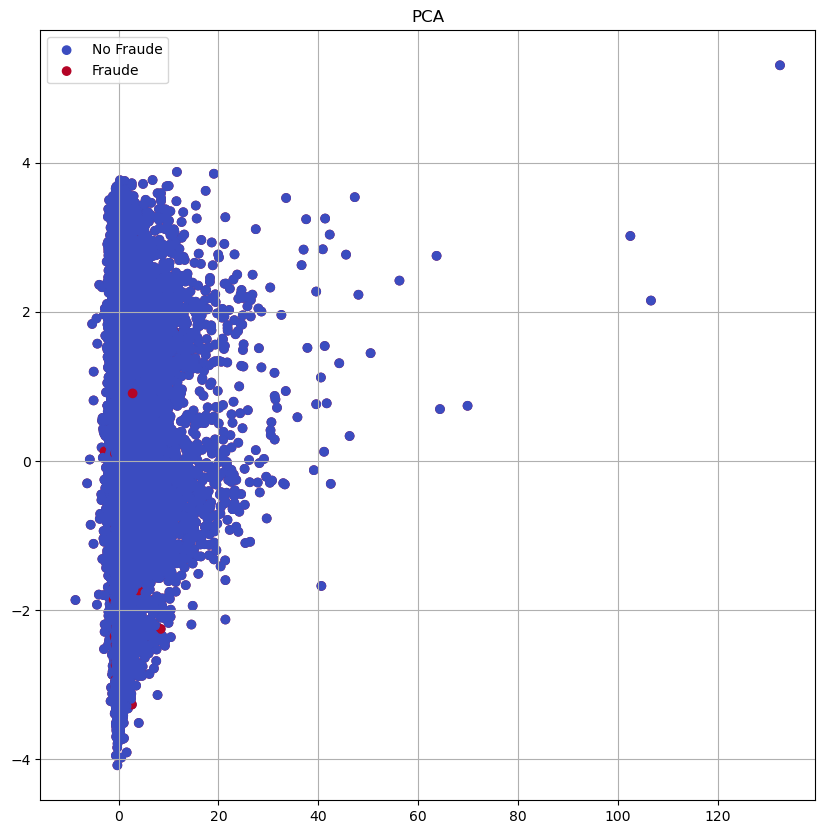

In [14]:
import matplotlib.pyplot as plt

fig,ax=plt.subplots(figsize=(10,10))

ax.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==0),label="No Fraude",linewidth=1,cmap="coolwarm")
ax.scatter(X_reduced_pca[:,0],X_reduced_pca[:,1],c=(Y==1),label="Fraude",linewidth=1,cmap="coolwarm")
ax.set_title("PCA")
ax.grid(True)

ax.legend()

## KMeans

Para probar entrenaremos a un KMeans con 5 clusters para probar

In [15]:
from sklearn.cluster import KMeans


kmeans = KMeans(n_clusters=5,random_state=42,init="k-means++")
data = kmeans.fit(X_reduced_pca[:,:2])
data

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=5, random_state=42)

Vamos a ver como se dibuja con los diferentes colores

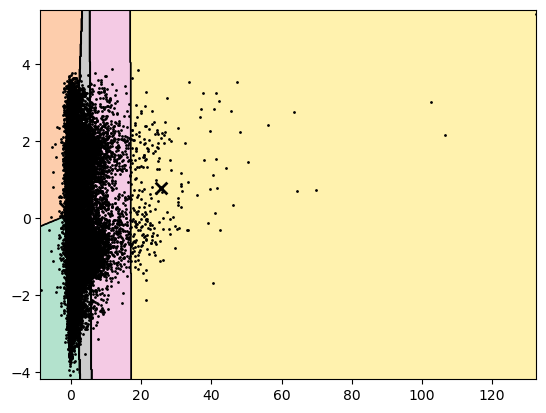

In [16]:
import numpy as np


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids,  circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution=1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),   np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)


plot_decision_boundaries(kmeans,X_reduced_pca[:,:2])

Tras esto vemos la inertia de los Clusters para ver como afecta cada Cluster al dibujo

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value 

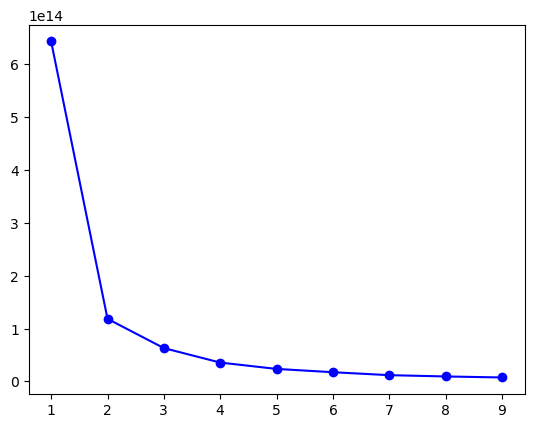

In [17]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X)
                for k in range(1, 10)]
inertias = [model.inertia_ for model in kmeans_per_k]

plt.plot(range(1, 10), inertias, "bo-")

Ahora con el Score para ver los Clusters más importantes

In [18]:
#from sklearn.metrics import silhouette_score
#silhouette_scores = [silhouette_score(X, model.labels_) for model in kmeans_per_k[1:]]
#plt.plot(range(2, 10), silhouette_scores, "bo-")

Con el cuchillo vemos que todos cumplen que lleguen a la media y que además están bien distribuidos por lo que esta gráfica no delata mucho

In [19]:
#import matplotlib as mpl
#from sklearn.metrics import silhouette_samples
#from matplotlib.ticker import FixedLocator, FixedFormatter
#
#plt.figure(figsize=(11, 9))
#
#for k in (3, 4, 5, 6):
#    plt.subplot(2, 2, k - 2)
#
#    y_pred = kmeans_per_k[k - 1].labels_
#    silhouette_coefficients = silhouette_samples(X, y_pred)
#
#    padding = len(X) // 30
#    pos = padding
#    ticks = []
#    for i in range(k):
#        coeffs = silhouette_coefficients[y_pred == i]
#        coeffs.sort()
#
#        color = mpl.cm.Spectral(i / k)
#        plt.fill_betweenx(np.arange(pos, pos + len(coeffs)), 0, coeffs,
#                          facecolor=color, edgecolor=color, alpha=0.7)
#        ticks.append(pos + len(coeffs) // 2)
#        pos += len(coeffs) + padding
#
#    plt.gca().yaxis.set_major_locator(FixedLocator(ticks))
#    plt.gca().yaxis.set_major_formatter(FixedFormatter(range(k)))
#    if k in (3, 5):
#        plt.ylabel("Cluster")
#
#    if k in (5, 6):
#        plt.gca().set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])
#        plt.xlabel("Silhouette Coefficient")
#    else:
#        plt.tick_params(labelbottom=False)
#
#    plt.axvline(x=silhouette_scores[k - 2], color="red", linestyle="--")
#    plt.title("$k={}$".format(k), fontsize=16)
#

## Conclusión Clustering

Tendriamos varias opciones pero las más viables a mi parecer sería usar 2 o 3 Clusters por los gráficos con picos proporcionados anteriormente y los cuchillos de anterioridad 

<li>En la primera gráfica observamos que a partir del 3º Cluster empieza a decaer la necesidad de más Clusters</li>
<li>En la segunda vemos que dos clusters y tres son </li>

In [20]:
import numpy as np


def plot_data(X):
    plt.plot(X[:, 0], X[:, 1], 'k.', markersize=2)

def plot_centroids(centroids,  circle_color='w', cross_color='k'):
    plt.scatter(centroids[:, 0], centroids[:, 1], marker='x', s=2, linewidths=12, color=cross_color, zorder=11, alpha=1)

def plot_decision_boundaries(clusterer, X):
    mins = X.min(axis=0) - 0.1
    maxs = X.max(axis=0) + 0.1
    resolution=1000
    xx, yy = np.meshgrid(np.linspace(mins[0], maxs[0], resolution),   np.linspace(mins[1], maxs[1], resolution))
    Z = clusterer.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.contourf(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  cmap="Pastel2")
    plt.contour(Z, extent=(mins[0], maxs[0], mins[1], maxs[1]),  linewidths=1, colors='k')
    plot_data(X)
    plot_centroids(clusterer.cluster_centers_)



#kmeans = KMeans(n_clusters=3,random_state=42,init="k-means++")
#data = kmeans.fit(X_reduced_pca[:,:2])
#plot_decision_boundaries(kmeans,X_reduced_pca[:,:2])

# Manejo de datos Pre-Entreno

## División de datos

In [21]:
import numpy as np
from sklearn.model_selection import train_test_split

np.random.seed(42)

df = pd.concat([X,Y],axis=1)
dfFraudes=pd.concat([df[df['Class']==1],df[df['Class']==0].sample(int(len(df[df['Class']==1])),random_state=42)])

dfSoloFraudes=df[df['Class']==1]
df = df[~df.isin(dfFraudes).all(1)]

dfFraudes=dfFraudes.sample(frac=1)

X_test = dfFraudes.drop("Class",axis=1)
y_test = dfFraudes['Class']

X_train,X_val,y_train,y_val = train_test_split(df.drop("Class",axis=1),df['Class'],test_size=0.2,random_state=42)

In [22]:
X_test

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount
280412,169518.0,-0.300026,0.949818,0.074290,0.933936,0.996314,-0.734827,1.065931,-0.046607,-0.682219,...,0.004937,0.166577,0.660828,-0.253749,-0.004951,-0.059794,-0.392513,0.422035,0.234143,2.00
95597,65385.0,-2.923827,1.524837,-3.018758,3.289291,-5.755542,2.218276,-0.509995,-3.569444,-1.016592,...,-0.447039,-0.511657,-0.122724,-4.288639,0.563797,-0.949451,-0.204532,1.510206,-0.324706,1354.25
72197,54608.0,0.786116,-1.067510,0.917200,0.885069,-0.987685,0.989969,-0.692766,0.296164,1.200257,...,0.365800,0.141353,0.412901,-0.432923,-0.366233,0.546041,0.702749,-0.008153,0.037743,207.10
75511,56098.0,-1.229669,1.956099,-0.851198,2.796987,-1.913977,-0.044934,-1.340739,-0.555548,-1.184468,...,0.270459,1.208054,0.277612,0.019266,0.508529,-0.201183,-0.249600,0.562239,0.075309,170.92
255556,157284.0,-0.242245,4.147186,-5.672349,6.493741,1.591168,-1.602523,-0.950463,0.722903,-4.128505,...,0.562030,0.249023,-0.480286,-0.286080,-1.153575,-0.035571,0.559628,0.409446,0.221048,0.77
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
239499,150138.0,-2.150855,2.187917,-3.430516,0.119476,-0.173210,0.290700,-2.808988,-2.679351,-0.556685,...,0.532145,-0.073205,0.561496,-0.075034,-0.437619,0.353841,-0.521339,0.144465,0.026588,50.00
43624,41582.0,-1.048005,1.300219,-0.180401,2.589843,-1.164794,0.031823,-2.175778,0.699072,-1.140208,...,0.644993,0.549014,0.624321,-0.136663,0.131738,0.030921,-0.176701,0.504898,0.069882,39.45
272010,164864.0,-0.085803,1.317150,1.942209,4.467548,-0.078762,0.896638,-0.063066,0.287527,-1.241481,...,0.277020,0.271079,1.065674,-0.164826,-0.105240,-0.667786,0.511267,0.495450,0.266918,5.89
119714,75556.0,-0.734303,0.435519,-0.530866,-0.471120,0.643214,0.713832,-1.234572,-2.551412,-2.057724,...,0.864536,-1.004877,1.150354,-0.152555,-1.386745,0.004716,0.219146,-0.058257,0.158048,29.95


In [23]:
from sklearn.preprocessing import MinMaxScaler

s=MinMaxScaler()

X_train = s.fit_transform(X_train)
X_val = s.fit_transform(X_val)
X_test = s.fit_transform(X_test)
dfSoloFraudes = s.fit_transform(dfSoloFraudes.drop("Class",axis=1))

# Predicción de Modelos

In [24]:
from tensorflow import keras
from tensorflow.keras import layers, models
from keras.datasets import fashion_mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.utils import to_categorical

In [25]:
X_train.shape

(227058, 30)

In [26]:

encoder = keras.models.Sequential([
    keras.layers.Dense(20,input_shape=[30],activation="relu"),
    keras.layers.Dense(10,activation="relu"),
    keras.layers.Dense(5, activation="relu")
])
encoder.summary()

c:\Users\diego.guizanlopez\AppData\Local\miniconda3\envs\deep-learning\Lib\site-packages\keras\src\layers\core\dense.py:86: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense (Dense)                   │ (None, 20)             │           620 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           210 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 5)              │            55 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 885 (3.46 KB)

 Trainable params: 885 (3.46 KB)

 Non-trainable params: 0 (0.00 B)

In [27]:
decoder = keras.models.Sequential([
    keras.layers.Dense(10, input_shape=[5], activation="relu"),
    keras.layers.Dense(20, activation="relu"),
    keras.layers.Dense(30),
    #keras.layers.Reshape(22)
])
decoder.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 10)             │            60 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 20)             │           220 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 30)             │           630 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 910 (3.55 KB)

 Trainable params: 910 (3.55 KB)

 Non-trainable params: 0 (0.00 B)

In [28]:
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ ?                      │           885 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential_1 (Sequential)       │ ?                      │           910 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,795 (7.01 KB)

 Trainable params: 1,795 (7.01 KB)

 Non-trainable params: 0 (0.00 B)

In [29]:
autoencoder.compile(loss="mse", optimizer="adam")

In [30]:
import sys


early_stopping_cb = keras.callbacks.EarlyStopping(patience=2,restore_best_weights=True)

history = autoencoder.fit(X_train,X_train, epochs=10,
                          validation_data=[X_val, X_val],callbacks=[early_stopping_cb])

Epoch 1/10


7096/7096 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step - loss: 0.0147 - val_loss: 0.0338
Epoch 2/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0019 - val_loss: 0.0321
Epoch 3/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0016 - val_loss: 0.0314
Epoch 4/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 7s 1ms/step - loss: 0.0016 - val_loss: 0.0312
Epoch 5/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0016 - val_loss: 0.0315
Epoch 6/10
7096/7096 ━━━━━━━━━━━━━━━━━━━━ 8s 1ms/step - loss: 0.0016 - val_loss: 0.0315


<Axes: >

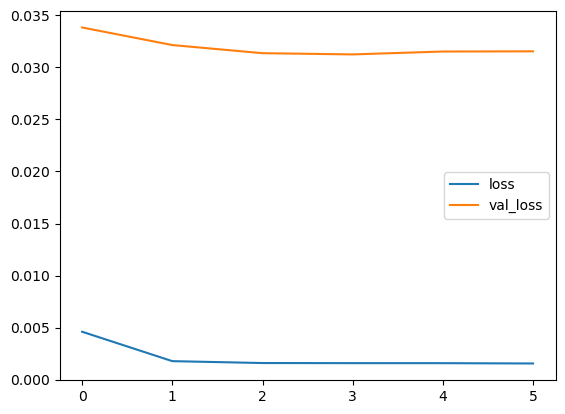

In [31]:
import pandas as pd

# Cuando hay una separación notable tras cruzada es el sobreentrenamiento
pd.DataFrame(history.history).plot()

In [32]:
autoencoder.evaluate(X_test,y_test)

31/31 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.3124 


0.3129075765609741

In [39]:
from sklearn.metrics import mean_squared_error

x = dfSoloFraudes
#y = dfSoloFraudes[:10]
predict = autoencoder.predict(x)

# Calcula el MSE para cada valor
mse_values_error = [np.square(mean_squared_error([true_val], [pred_val])) for true_val, pred_val in zip(x, predict)]

#mse_values = mean_squared_error(x, predict)

#print(mse_values.mean())



16/16 ━━━━━━━━━━━━━━━━━━━━ 0s 934us/step


In [40]:
mse_values_error

[0.10072741489506139,
 0.0699827981212817,
 0.06014641828078214,
 0.09086636609844884,
 0.09383041046279708,
 0.05321384813325959,
 0.10316636214425785,
 0.06451616601842859,
 0.05350651699371979,
 0.057574696708782284,
 0.05715367193066025,
 0.0453139986375825,
 0.07153986408865176,
 0.0773271944784328,
 0.0604006713424503,
 0.04964468282701961,
 0.07367520905002325,
 0.07710546103082853,
 0.1098636433112248,
 0.0724805464691753,
 0.0725008446708265,
 0.1001267367318381,
 0.08436293297965802,
 0.1083475026931402,
 0.0569287934358583,
 0.04932376327661351,
 0.07796627349022836,
 0.05621118422270126,
 0.08135003997718661,
 0.057376821385987035,
 0.049248414342534005,
 0.09548564909912122,
 0.10900421530420586,
 0.057713479375277446,
 0.09417316623775578,
 0.06644117387313642,
 0.07263205664617271,
 0.05110207341743469,
 0.10031325568129766,
 0.08251317060896178,
 0.06148288984327251,
 0.07105818259212103,
 0.09806955539347027,
 0.08964235178391253,
 0.10110644693928664,
 0.0565225306122

In [34]:
mse_values_error
st = np.std(mse_values_error)
st

0.019821763311087974

In [35]:
from sklearn.metrics import mean_squared_error

x = X_val
#y = dfSoloFraudes[:10]
predict = autoencoder.predict(x)

# Calcula el MSE para cada valor
mse_values = [mean_squared_error([true_val], [pred_val]) for true_val, pred_val in zip(x, predict)]

#mse_values = mean_squared_error(x, predict)

#print(mse_values.mean())


   1/1774 ━━━━━━━━━━━━━━━━━━━━ 59s 34ms/step

1774/1774 ━━━━━━━━━━━━━━━━━━━━ 1s 762us/step


In [38]:
mse_values
stNoFraudes = np.std(mse_values)
range=[stNoFraudes*2+np.array(mse_values).mean(),np.array(mse_values).mean()-stNoFraudes*2]


[0.03649969571638993, 0.02598557040530384]

In [37]:
def detectar_fraude(value):
    global range
    error=mean_squared_error(value)
    if error>range[0] or error<range[1]:
        return 1
    return 0
